# 6.3 Geographic Visualization 

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data cleaning
#### 3. Plotting a choropleth


### 1. Import data and libraries

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# Prompting matplotlib visuals to appear in the notebook 

%matplotlib inline

In [49]:
# Importing ".json" file for New South Wales LGA. 

country_geo = r'C:\Users\Sarah\Desktop\Data Course\Task 6\02 Data\Original Data\insurance [MConverter.eu].json'

In [50]:
f = open(r'C:\Users\Sarah\Desktop\Data Course\Task 6\02 Data\Original Data\insurance [MConverter.eu].json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'name': 'Midwest'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-104.32617187499999, 49.03786794532644], [-103.974609375, 41.04621681452063], [-101.6015625, 41.04621681452063], [-102.48046875, 37.020098201368114], [-94.5703125, 37.09023980307208], [-93.603515625, 36.4566360115962], [-89.296875, 37.23032838760387], [-87.71484375, 38.272688535980976], [-85.4296875, 38.54816542304656], [-84.638671875, 39.16414104768742], [-83.232421875, 38.75408327579141], [-82.177734375, 38.685509760012], [-80.85937499999999, 39.842286020743394], [-80.595703125, 41.57436130598913], [-83.583984375, 41.96765920367816], [-82.79296874999999, 42.4234565179383], [-82.705078125, 43.389081939117496], [-83.232421875, 43.70759350405294], [-84.111328125, 43.96119063892024], [-83.49609375, 44.653024159812], [-84.55078125, 45.460130637921004], [-85.4296875, 45.1510532655634], [-86.396484375, 44.213709909702054], [-86.220703125, 43.389081939117496], [-86.220703125, 42.163403424

In [83]:
# Import insurance data

#Importing data set insurance.csv
df = pd.read_csv(r'C:\Users\Sarah\Desktop\Data Course\Task 6\02 Data\Original Data\insurancecsv.csv', index_col = False)

In [84]:
df.head()

,Row Labels,Average of bmi
0,northeast,29.173503
1,northwest,29.199785
2,southeast,33.355989
3,southwest,30.596615


In [94]:
df.rename(columns = {'Row Labels' : 'Region', 'Average of bmi': 'BMI Average'}, inplace = True)

In [95]:
df.shape

(4, 2)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       4 non-null      object 
 1   BMI Average  4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


### 2. Conduct consistency checks

In [97]:
# Check for missing values

df.isnull().sum()

Region         0
BMI Average    0
dtype: int64

##### Duplicates check

In [98]:
dups = df.duplicated()

In [99]:
dups.shape # no dups

(4,)

In [100]:
##### Extreme values checks

<AxesSubplot:xlabel='BMI Average', ylabel='Count'>

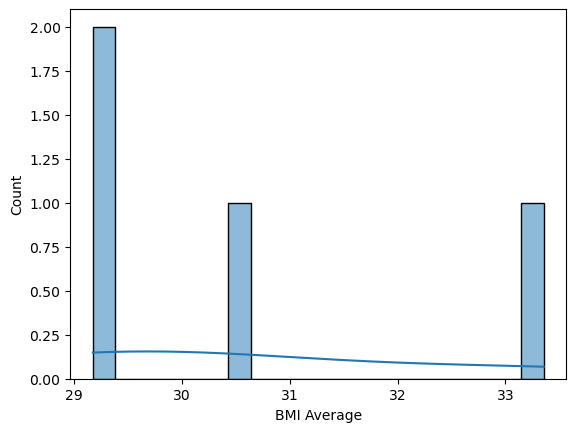

In [102]:
sns.histplot(df['BMI Average'], bins=20, kde = True) # shows extreme values for 'bmi'

### 3. Data Cleaning

In [103]:
# The frequency of listing by region
df['Region'].value_counts(dropna = False)

northeast    1
northwest    1
southeast    1
southwest    1
Name: Region, dtype: int64

In [104]:
df.shape

(4, 2)

### 4. Plotting a choropleth

In [105]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot = df[['Region','BMI Average']]
data_to_plot.head(100)

,Region,BMI Average
0,northeast,29.173503
1,northwest,29.199785
2,southeast,33.355989
3,southwest,30.596615


In [108]:
# Setting up a map
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['Region','BMI Average'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "BMI's per region").add_to(map)

folium.LayerControl().add_to(map)

map